In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
df = pd.read_csv("/Users/aditineve/Desktop/Code alpha/Unemployment_in_India.csv")


In [31]:

df.tail()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [35]:
df.shape


(768, 7)

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [41]:
df.isnull().sum()


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [43]:
df = df.dropna()               


In [45]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [73]:
df.columns = df.columns.str.strip()



In [75]:
print(df.columns)



Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [77]:
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate'
}, inplace=True)


In [79]:
df['Unemployment_Rate'] = pd.to_numeric(df['Unemployment_Rate'], errors='coerce')


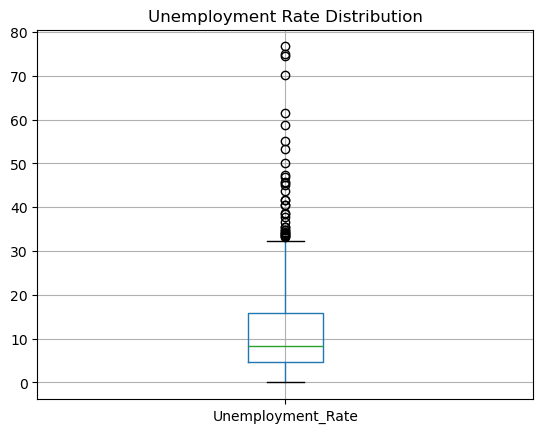

In [81]:
import matplotlib.pyplot as plt

df.boxplot(column='Unemployment_Rate')
plt.title("Unemployment Rate Distribution")
plt.show()


In [ ]:
#data exploration


In [83]:
df.describe()


,Unemployment_Rate,Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [85]:
df['Unemployment_Rate'].value_counts()


Unemployment_Rate
0.00     11
3.31      4
12.50     3
5.45      3
6.67      3
         ..
13.70     1
4.03      1
40.59     1
3.69      1
9.86      1
Name: count, Length: 624, dtype: int64

In [87]:
df['Date'].min(), df['Date'].max()


(' 29-02-2020', ' 31-12-2019')

In [93]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [95]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year


In [97]:
yearly_avg = df.groupby('Year')['Unemployment_Rate'].mean()
print(yearly_avg)


Year
2019     9.399047
2020    15.101581
Name: Unemployment_Rate, dtype: float64


In [99]:
region_avg = df.groupby('Region')['Unemployment_Rate'].mean()
print(region_avg)


Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name: Unemployment_Rate, dtype: float64


In [101]:
area_avg = df.groupby('Area')['Unemployment_Rate'].mean()
print(area_avg)


Area
Rural    10.324791
Urban    13.166614
Name: Unemployment_Rate, dtype: float64


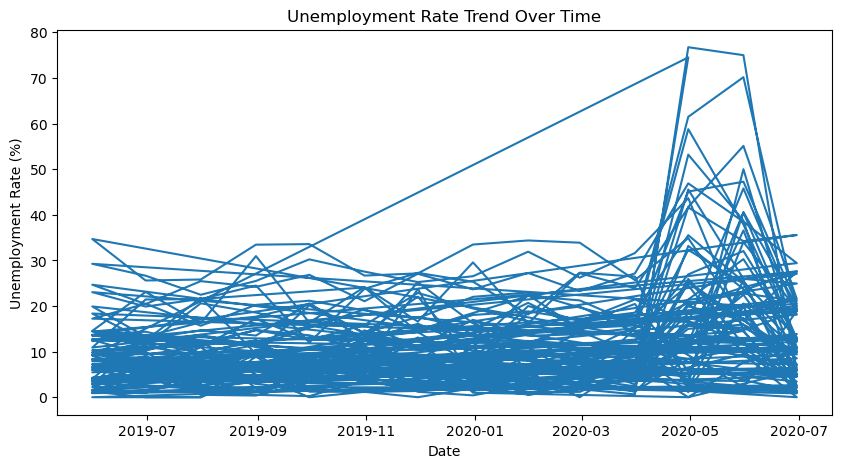

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Unemployment_Rate'])
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trend Over Time")
plt.show()


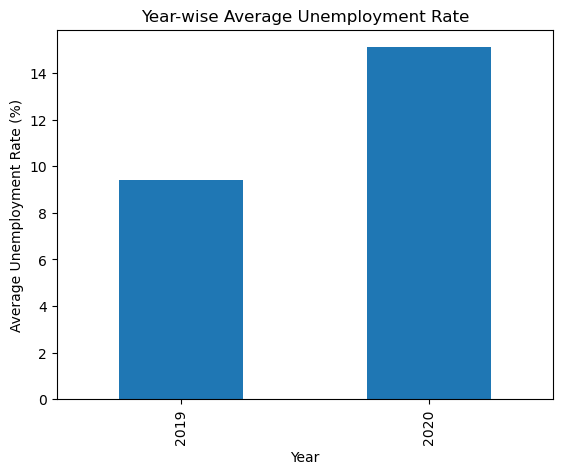

In [105]:
yearly_avg.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Year-wise Average Unemployment Rate")
plt.show()


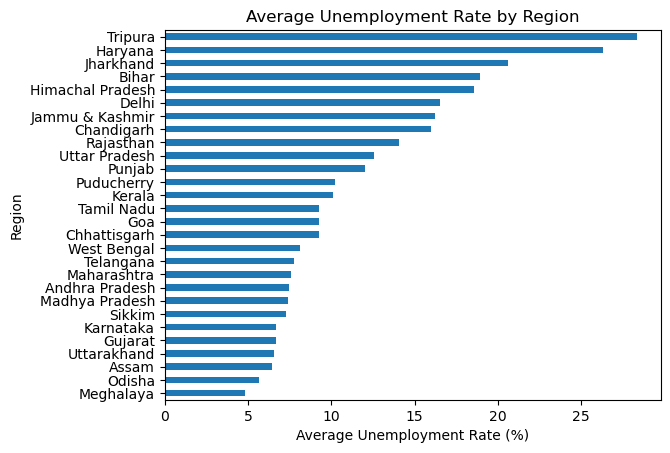

In [107]:
region_avg.sort_values().plot(kind='barh')
plt.xlabel("Average Unemployment Rate (%)")
plt.title("Average Unemployment Rate by Region")
plt.show()


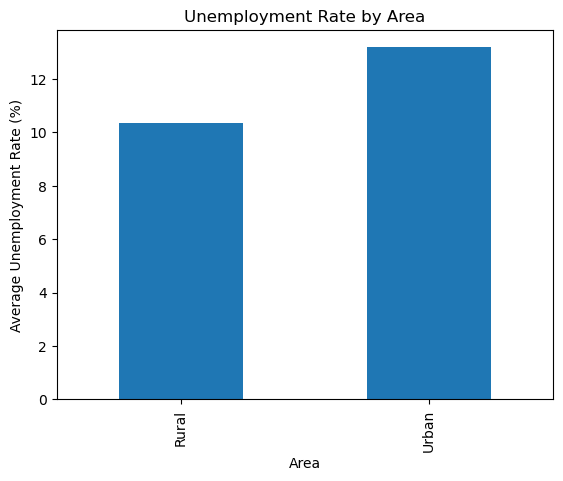

In [109]:
area_avg.plot(kind='bar')
plt.xlabel("Area")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Unemployment Rate by Area")
plt.show()


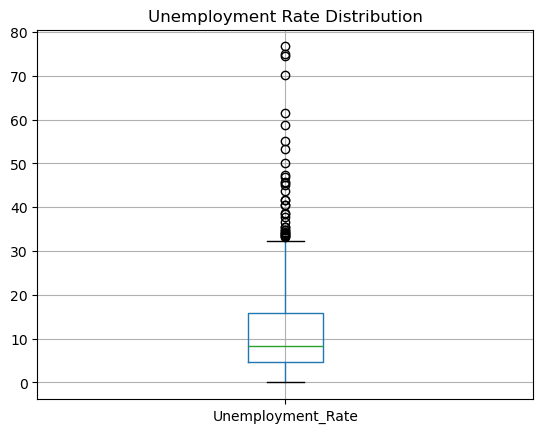

In [111]:
df.boxplot(column='Unemployment_Rate')
plt.title("Unemployment Rate Distribution")
plt.show()


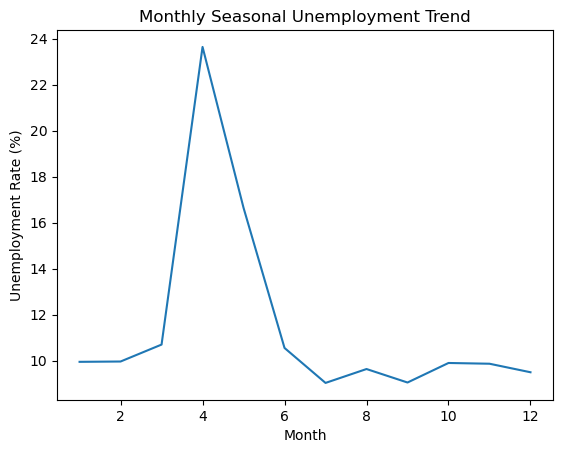

In [113]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Unemployment_Rate'].mean()

monthly_avg.plot()
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.title("Monthly Seasonal Unemployment Trend")
plt.show()


In [115]:
pre_covid = df[df['Date'] < '2020-03']
post_covid = df[df['Date'] >= '2020-03']


In [117]:
print("Pre-COVID Average:", pre_covid['Unemployment_Rate'].mean())
print("Post-COVID Average:", post_covid['Unemployment_Rate'].mean())


Pre-COVID Average: 9.509533582089553
Post-COVID Average: 17.774362745098042
